# Advertisement Investigation

This notebook is part of a capstone project of the [Machine Learning Zoomcamp](https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp) course Cohort 2022. 	

In this project we will work with the advertising data of a marketing agency to develop a machine learning algorithm that predicts if a particular user click on an advertisement. We use the Kaggle's [Advertisement - Click on Ad dataset](https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad). This dataset contains 10 features:
+ 'Daily Time Spent on Site' - user time on site in minutes.
+ 'Age' - user age in years.
+ 'Area Income' - average income of geographical area of a user.
+ 'Daily Internet Usage' - average time in minutes a user spends online per day.
+ 'Ad Topic Line' - the headline of the advertisement.
+ 'City' - the city of a user.
+ 'Male' - whether or not a user is a male.
+ 'Country' - the country of a user.
+ 'Timestamp' - time at which a user clicked on Ad or closed window.
+ 'Clicked on Ad' - 0 or 1 indicated clicking on Ad.

This is a binary classification problem, where we have to predict 'Clicked on Ad' variable which is 1 if a user clicks on an advertisement and 0 if a user didn't click on an advertisement. We will try the following models: LogisticRegression(), RandomForestClasiifier() and XGBoost(). AUC metric will be used as an evaluation score during the model selection process.


This notebook contains:
* [Importing](#Importing)
* [Data preparation and data clearning](#Data_preparation)
    - [Deleting of unnecessary columns](#Deleting_of_unnecessary_columns)
    - [Renaming columns](#Renaming_columns)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
    - [Data information](#Data_information)
    - [Check for missing values](#Check_for_missing_values)
    - [Check for duplicated records](#Check_for_duplicated_records)
    - [Analysis of target variable](#Analysis_of_target_variable)
    - [Visualization of the distribution of features](#Visualization_of_the_distribution_of_features)
    - [Feature importance analysis](#Feature_importance_analysis)
* [Splitting the dataset into train, val and test parts](#Splitting_the_dataset_into_train_val_and_test_parts)
* [Model training](#Model_training)
    - [Logistic Regression](#Logistic_Regression)
        - [Base LogisticRegression model](#Base_LogisticRegression_model)
        - [LogisticRegression hyperparameters tuning](#LogisticRegression_hyperparameters_tuning)
        - [Best LogisticRegression model](#Best_LogisticRegression_model)
    - [Random Forest](#Random_Forest)
        - [Base RandomForestClassifier model](#Base_RandomForest_model)
        - [RandomForestClassifier hyperparameters tuning](#RandomForest_hyperparameters_tuning)
        - [Best RandomForestClassifier model](#Best_RandomForest_model)
    - [XGBoost](#XGBoost)
        - [Base XGBoost model](#Base_XGBoost_model)
        - [XGBoost hyperparameters tuning](#XGBoost_hyperparameters_tuning)
        - [Best XGBoost model](#Best_XGBoost_model)
* [Selecting the final model](#Selecting_the_final_model)
    - [Train the final model](#Train_the_final_model)

# Importing <a class="anchor" id="Importing"></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore');

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Data preparation and data clearning <a class="anchor" id="Data_preparation"></a>

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [4]:
df.shape

(1000, 10)

In [5]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [6]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

### Deleting of unnecessary columns <a class="anchor" id="Deleting_of_unnecessary_columns"></a>

We have noticed that some columns have a lot of unique values. It is ok for numerical features, but categorical features with many unique features do not bring us much profit. Let's find such columns and delete them.

In [7]:
df[list(df.dtypes[df.dtypes == 'object'].index)].nunique()

Ad Topic Line    1000
City              969
Country           237
Timestamp        1000
dtype: int64

We will delete columns 'Ad Topic Line' and 'Timestamp'.

In [8]:
df.drop(['Timestamp'], inplace=True, axis=1)
df.drop(['Ad Topic Line'], inplace=True, axis=1)

### Renaming columns <a class="anchor" id="Renaming_columns"></a>

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.rename(columns={'male':'gender'})
df.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,city,gender,country,clicked_on_ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0


In [10]:
df.gender = df.gender.map({1: 'Male', 0: 'Female'}) 
df.gender.value_counts()

Female    519
Male      481
Name: gender, dtype: int64

# Exploratory Data Analysis <a class="anchor" id="Exploratory_Data_Analysis"></a>

- [Data information](#Data_information)
- [Check for missing values](#Check_for_missing_values)
- [Check for duplicated records](#Check_for_duplicated_records)
- [Examination of statistics for each feature](#Examination_of_statistics_for_each_feature)
- [Visualization of the distribution of features](#Visualization_of_the_distribution_of_features)
- [Feature importance analysis](#Feature_importance_analysis)

### Data Information <a class="anchor" id="Data_information"></a>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area_income               1000 non-null   float64
 3   daily_internet_usage      1000 non-null   float64
 4   city                      1000 non-null   object 
 5   gender                    1000 non-null   object 
 6   country                   1000 non-null   object 
 7   clicked_on_ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


In [12]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(exclude=['object']).columns.tolist()

In [13]:
# categorical features
categorical

['city', 'gender', 'country']

In [14]:
# numerical features
numerical

['daily_time_spent_on_site',
 'age',
 'area_income',
 'daily_internet_usage',
 'clicked_on_ad']

In [15]:
# statistics for numerical features
df.describe().round(3)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,clicked_on_ad
count,1000.000,1000.000,1000.000,1000.000,1000.0
mean,65.000,36.009,55000.000,180.000,0.5
std,15.854,8.786,13414.634,43.902,0.5
min,32.600,19.000,13996.500,104.780,0.0
25%,51.360,29.000,47031.802,138.830,0.0
50%,68.215,35.000,57012.300,183.130,0.5
75%,78.548,42.000,65470.635,218.793,1.0
max,91.430,61.000,79484.800,269.960,1.0


In [16]:
# range of values for categorical features
for col in categorical:
    print(f'Feature: `{col}`')
    print(f'Number of distinct elements: {df[col].nunique()}')
    print(f"From '{df[col].unique().min()}' to '{df[col].unique().max()}'.")
    print()

Feature: `city`
Number of distinct elements: 969
From 'Adamsbury' to 'Zacharyton'.

Feature: `gender`
Number of distinct elements: 2
From 'Female' to 'Male'.

Feature: `country`
Number of distinct elements: 237
From 'Afghanistan' to 'Zimbabwe'.



### Check for missing values <a class="anchor" id="Check_for_missing_values"></a>

In [17]:
df.isnull().sum()

daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
city                        0
gender                      0
country                     0
clicked_on_ad               0
dtype: int64

### Check for duplicated records <a class="anchor" id="Check_for_duplicated_records"></a>

In [18]:
df.duplicated().any()

False

### Analysis of target variable <a class="anchor" id="Analysis_of_target_variable"></a>

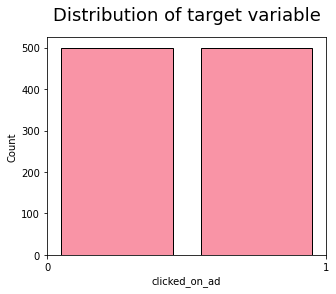

In [19]:
plt.figure(figsize=(5, 4))
plt.title("Distribution of target variable", y=1.05, size=18)
sns.histplot(df, x="clicked_on_ad", bins=2, shrink=.8, color='#f77189')
plt.xticks([0, 1])
plt.show()

We notice that the distribution of target variable is uniform, so we do not neet to handle it.

### Visualization of the distribution of features <a class="anchor" id="Visualization_of_the_distribution_of_features"></a>

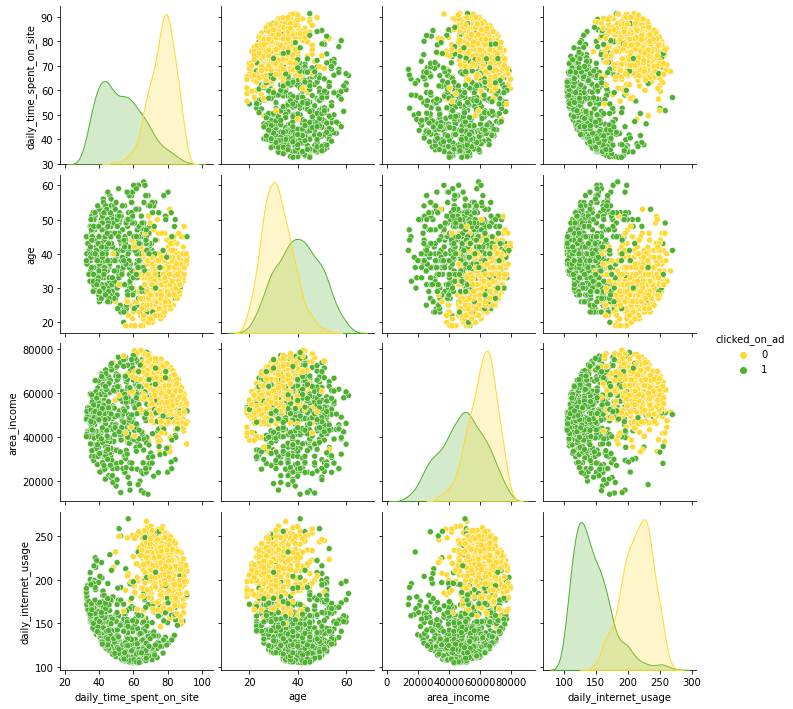

In [20]:
# Distribution of numerical features
sns.pairplot(df, hue='clicked_on_ad', palette=['#ffd92f', '#50b131'])

Since the categorical features `city` and `country` have too many different values we will not visualize them.

In [21]:
df[categorical].nunique()

city       969
gender       2
country    237
dtype: int64

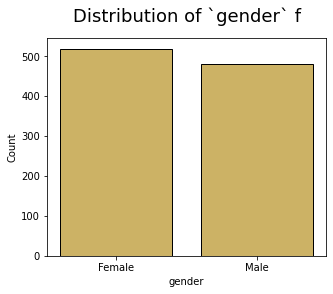

In [22]:
plt.figure(figsize=(5, 4))
plt.title("Distribution of `gender` f", y=1.05, size=18)
sns.histplot(df.gender, shrink=.8, color='#bb9832')
plt.show()

### Feature importance analysis <a class="anchor" id="Feature_importance_analysis"></a>

#### Correlations between numerical features

Let's visualize the degrees of dependencies between numerical features using a correlation matrix and a heatmap.

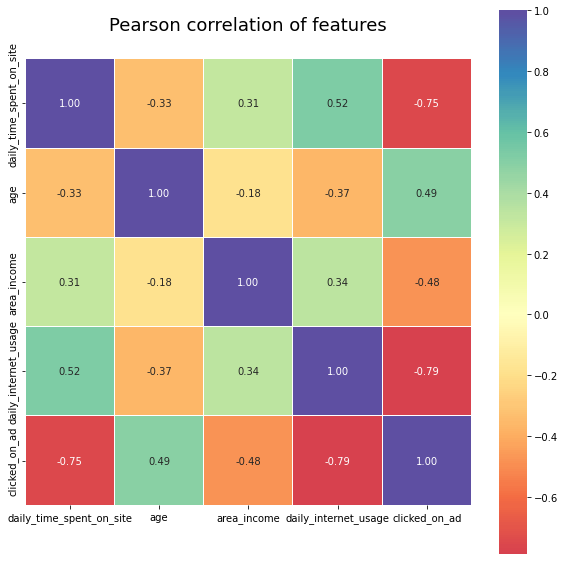

In [23]:
plt.figure(figsize=(10,10))
plt.title("Pearson correlation of features", y=1.05, size=18)
sns.heatmap(df.corr(), center=0, cmap='Spectral', 
            linewidths=0.1, linecolor='white', square=True, 
            annot=True, fmt='.2f');

We can see that target feature `clicked_on_ad` has the strong negative correlation with features `daily_internet_usage` and `daily_time_spent_on_site`.

#### Mutual information for categorical features

Let's calculate mutual information - a measure of importance of categorical features for the target feature.

In [24]:
def mutual_info_clicked_on_ad(series):
    return mutual_info_score(series, df.clicked_on_ad)

In [25]:
mi = df[categorical].apply(mutual_info_clicked_on_ad)
mi.sort_values(ascending=False).round(4).to_frame(name='Mutual information')

,Mutual information
city,0.6755
country,0.1346
gender,0.0007


We can see that target feature `clicked_on_ad` has the best mutual information score with `city` feature.

## Splitting the dataset into train, val and test parts <a class="anchor" id="Splitting_the_dataset_into_train_val_and_test_parts"></a>

In [26]:
def split_train_val_test(df, val_size, test_size, target, random_state):
    """
    Splits the dataset into 3 parts: train/validation/test with 
    (1-val_size-test_size)/val_size/test_size distribution. 
    Extracts the target variable from all datasets.
    """
    
    # Split the dataset into 2 parts: full_train/test with (train_size+val_size)/test_size distribution
    df_full_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # Split the full_train dataset into 2 parts: train/val with train_size/val_size distribution
    df_train, df_val = train_test_split(df_full_train, test_size=val_size/(1-test_size), random_state=random_state)
    
    # Verify the shapes of datasets
    print(f'train: {df_train.shape}, val: {df_val.shape}, test: {df_test.shape}')
    
    # Reset indices of all datasets 
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_full_train = df_full_train.reset_index(drop=True)
    
    # Extract target variable from all datasets 
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values
    y_full_train = df_full_train[target].values

    # Delete target variable from all datasets 
    del df_train[target]
    del df_val[target]
    del df_test[target]
    del df_full_train[target]
    
    return df_full_train, y_full_train, df_train, df_val, df_test, y_train, y_val, y_test

In [27]:
df_full_train, y_full_train, df_train, df_val, df_test, y_train, y_val, y_test =\
            split_train_val_test(df, 0.2, 0.2, 'clicked_on_ad', 1)

train: (600, 8), val: (200, 8), test: (200, 8)


In [28]:
# use DictVectorizer to turn train and validation into matrices
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

X_train.shape, X_val.shape

((600, 814), (200, 814))

## Model training <a class="anchor" id="Model_training"></a>
We will train and tune the following models:
- [Logistic Regression](#Logistic_Regression)
    - [Base LogisticRegression model](#Base_LogisticRegression_model)
    - [LogisticRegression hyperparameters tuning](#LogisticRegression_hyperparameters_tuning)
    - [Best LogisticRegression model](#Best_LogisticRegression_model)
- [Random Forest](#Random_Forest)
    - [Base RandomForestClassifier model](#Base_RandomForest_model)
    - [RandomForestClassifier hyperparameters tuning](#RandomForest_hyperparameters_tuning)
    - [Best RandomForestClassifier model](#Best_RandomForest_model)
- [XGBoost](#XGBoost)
    - [Base XGBoost model](#Base_XGBoost_model)
    - [XGBoost hyperparameters tuning](#XGBoost_hyperparameters_tuning)
    - [Best XGBoost model](#Best_XGBoost_model)

### Logistic Regression <a class="anchor" id="Logistic_Regression"></a>

#### Base LogisticRegression model <a class="anchor" id="Base_LogisticRegression_model"></a>

In [29]:
lr_base = LogisticRegression(random_state=1)
lr_base.fit(X_train, y_train)
y_pred = lr_base.predict(X_val)
print(f'Base model AUC on validation dataset: {roc_auc_score(y_val, y_pred).round(3)}.')

Base model AUC on validation dataset: 0.892.


In [30]:
y_pred = lr_base.predict(X_train)
print(f'Base model AUC on train dataset: {roc_auc_score(y_train, y_pred).round(3)}.')

Base model AUC on train dataset: 0.899.


#### LogisticRegression hyperparameters tuning <a class="anchor" id="LogisticRegression_hyperparameters-tuning"></a>

For LogisticRegression hyperparameters tuning we will use GridSearchCV.

In [31]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [2000]
}

estimator = LogisticRegression(random_state=1)

lr_gridsearch = GridSearchCV(
    estimator=estimator, 
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=-1
)
lr_gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [2000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc')

GridSearchCV found the following best parameter values for LogisticRegression:

In [32]:
lr_gridsearch.best_params_

{'C': 1, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}

#### Best LogisticRegression model <a class="anchor" id="Best_LogisticRegression_model"></a>

Now let's train the best model - LogisticRegression with the best parameters.

In [33]:
lr_best = lr_gridsearch.best_estimator_
lr_best.fit(X_train, y_train)
y_pred = lr_best.predict(X_val)
print(f'Best model AUC on validation dataset: {roc_auc_score(y_val, y_pred).round(3)}.')

Best model AUC on validation dataset: 0.975.


In [34]:
print(f'Best model AUC on train dataset: {lr_gridsearch.best_score_.round(3)}.')

Best model AUC on train dataset: 0.996.


### Random Forest <a class="anchor" id="Random_Forest"></a>
#### Base RandomForestClassifier model <a class="anchor" id="Base_RandomForest_model"></a>

In [35]:
rf_base = RandomForestClassifier(random_state=1)
rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_val)
print(f'Base model AUC on validation dataset: {roc_auc_score(y_val, y_pred).round(3)}.')

Base model AUC on validation dataset: 0.946.


In [36]:
y_pred = rf_base.predict(X_train)
print(f'Base model AUC on train dataset: {roc_auc_score(y_train, y_pred).round(3)}.')

Base model AUC on train dataset: 1.0.


It seems that the base RandomForestClassifier model is overfitted. Now let's tune hyperparameters to avoid overfitting.

#### RandomForestClassifier hyperparameters tuning <a class="anchor" id="RandomForest_hyperparameters_tuning"></a>

For RandomForestClassifier hyperparameters tuning we will use GridSearchCV.

In [37]:
parameters = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10],
    'max_features':[3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5]
}

estimator = RandomForestClassifier(random_state=1)

rf_gridsearch = GridSearchCV(
    estimator=estimator, 
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=-1
)
rf_gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

GridSearchCV found the following best parameter values for RandomForestClassifier:

In [38]:
rf_gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 1,
 'n_estimators': 100}

#### Best RandomForestClassifier model <a class="anchor" id="Best_RandomForest_model"></a>

Now let's train the best model - RandomForestClassifier with the best parameters.

In [39]:
rf_best = rf_gridsearch.best_estimator_
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_val)
print(f'Best model AUC on validation dataset: {roc_auc_score(y_val, y_pred).round(3)}.')

Best model AUC on validation dataset: 0.941.


In [40]:
print(f'Best model AUC on train dataset: {rf_gridsearch.best_score_.round(3)}.')

Best model AUC on train dataset: 0.988.


### XGBoost <a class="anchor" id="XGBoost"></a>
#### Base XGBoost model <a class="anchor" id="Base_XGBoost_model"></a>

In [41]:
xgb_base = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=1)
xgb_base.fit(X_train, y_train)
y_pred = xgb_base.predict(X_val)
print(f'Base model AUC on validation dataset: {roc_auc_score(y_val, y_pred).round(3)}.')

Base model AUC on validation dataset: 0.956.


In [42]:
y_pred = xgb_base.predict(X_train)
print(f'Base model AUC on train dataset: {roc_auc_score(y_train, y_pred).round(3)}.')

Base model AUC on train dataset: 1.0.


It seems that the base model is overfitted. Now let's tune hyperparameters to avoid overfitting.

#### XGBoost hyperparameters tuning <a class="anchor" id="XGBoost_hyperparameters_tuning"></a>

In [43]:
parameters = {
    'learning_rate': [0.05, 0.1, 0.3],
    'n_estimators': [50, 100],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5]
}

estimator = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=1)

xgb_gridsearch = GridSearchCV(
    estimator=estimator, 
    param_grid=parameters,
    scoring='roc_auc', 
    n_jobs=-1
)
xgb_gridsearch.fit(X_train, y_train);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:31: FutureWar

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

GridSearchCV found the following best parameter values for XGBoost:

In [44]:
xgb_gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100}

#### Best XGBoost model <a class="anchor" id="Best_XGBoost_model"></a>

Now let's train the best model - XGBoost with the best parameters.

In [45]:
xgb_best = xgb_gridsearch.best_estimator_
xgb_best.fit(X_train, y_train)
y_pred = xgb_best.predict(X_val)
print(f'Best model AUC on validation dataset: {roc_auc_score(y_val, y_pred).round(3)}.')

Best model AUC on validation dataset: 0.966.


In [46]:
print(f'Best model AUC on train dataset: {xgb_gridsearch.best_score_.round(3)}.')

Best model AUC on train dataset: 0.994.


## Selecting the final model <a class="anchor" id="Selecting_the_final_model"></a>

Let's gather all the models with their best hyperparameters, which were considered above, and calculate RMSE on train and validation sets. 

In [47]:
best_models = {'LogisticRegression': lr_best,
           'RandomForestClassifier': rf_best,
                          'XGBoost': xgb_best
              }

In [48]:
auc_score = []

for name, model in best_models.items():
    model.fit(X_train, y_train)
    auc_train = roc_auc_score(y_train, model.predict(X_train)) 
    auc_val = roc_auc_score(y_val, model.predict(X_val))

    auc_score.append((name, auc_train.round(3), auc_val.round(3)));

In [49]:
columns = ['model', 'auc_train', 'auc_val']
df_scores = pd.DataFrame(auc_score, columns=columns).set_index('model')
df_scores

,auc_train,auc_val
model,,
LogisticRegression,0.972,0.975
RandomForestClassifier,0.959,0.941
XGBoost,0.997,0.966


Based on the values of the AUC scores on validation dataset we conclude that 'LogisticRegression' is the best final model.

#### Train the final model <a class="anchor" id="Train_the_final_model"></a>

In [50]:
# use DictVectorizer to turn full_train and test into matrices
dv = DictVectorizer(sparse=False)

full_train_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

X_full_train.shape, X_test.shape

((800, 1018), (200, 1018))

In [51]:
model_final = lr_best
print(f'Final model is {model_final}.')

Final model is LogisticRegression(C=1, max_iter=2000, penalty='l1', random_state=1,
                   solver='liblinear').


In [52]:
model_final.fit(X_full_train, y_full_train)
y_pred = model_final.predict(X_test)
print(f'Final model AUC on test dataset: {roc_auc_score(y_test, y_pred).round(3)}.')

Final model AUC on test dataset: 0.944.
